# Flipkart Home-Appliance

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import time
from webdriver_manager.chrome import ChromeDriverManager

In [1]:
# Set up Selenium
options = Options()
#options.add_argument("--headless")  # Run in headless mode (no GUI)
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

def scrape_product_details(product_url):
    driver.get(product_url)
    
    # Extract product details
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    # Modify these selectors based on the product page structure
    name = soup.find('span', class_='VU-ZEz').text.strip() if soup.find('span', class_='VU-ZEz') else 'N/A'
    rating = soup.find('div', class_ ='XQDdHH').text.strip() if soup.find('div', class_ ='XQDdHH') else 'N/A'
    review = soup.find('span', class_='Wphh3N').text.strip() if soup.find('span', class_='Wphh3N') else 'N/A'
    price = soup.find('div', class_='Nx9bqj CxhGGd').text.strip() if soup.find('div', class_='Nx9bqj CxhGGd') else 'N/A'
    actualprice = soup.find('div', class_='yRaY8j A6+E6v').text.strip() if soup.find('div', class_='yRaY8j A6+E6v') else 'N/A'
    discount = soup.find('div', class_='UkUFwK WW8yVX').text.strip() if soup.find('div', class_='UkUFwK WW8yVX') else 'N/A'
    brand=soup.find('div',class_='_7dPnhA').text.strip() if soup.find('div',class_='_7dPnhA') else 'N/A'
    return {
        'Product Name': name,
        'Ratings': rating,
        'Review': review,
        'Price': price,
        'ActualPrice': actualprice,
        'Discount': discount,
        'Brands':brand
        }

def scrape_books(url):
    elect_data = []
    page_count = 0  # Limit to 30 pages
    
    while url and page_count < 20:
        driver.get(url)
        
        # Scroll down to load more 
        last_height = driver.execute_script("return document.body.scrollHeight")
        
        while True:
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

            new_height = driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height

        soup = BeautifulSoup(driver.page_source, 'html.parser')
        electronics = soup.find_all('div', class_='slAVV4')

        for elect in electronics:
            try:
                # Get product link
                product_link = elect.find('a', class_='wjcEIp')['href']
                full_product_url = 'https://www.flipkart.com' + product_link

                # Scrape product details
                product_details = scrape_product_details(full_product_url)

                # Print details
                print(product_details)
                elect_data.append(product_details)

            except Exception as e:
                print(f"Error processing book: {e}")

        page_count += 1
 
        # Find the next page URL
        next_page = soup.find('a', class_='_9QVEpD')
        if next_page and 'href' in next_page.attrs:
            url = 'https://www.flipkart.com' + next_page['href']
        else:
            url = None

    # Convert list to DataFrame
    df = pd.DataFrame(elect_data)
    return df
 
# Start scraping from the first page
df_elect = scrape_books('https://www.flipkart.com/search?q=kitchen+appliances&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.brand%255B%255D%3DPrestige&p%5B%5D=facets.brand%255B%255D%3DButterfly&p%5B%5D=facets.brand%255B%255D%3DPigeon&p%5B%5D=facets.brand%255B%255D%3DLG&p%5B%5D=facets.brand%255B%255D%3DPreethi&p%5B%5D=facets.brand%255B%255D%3DVGAURD&p%5B%5D=facets.brand%255B%255D%3DVenus')
driver.quit()  # Close the browser when done




{'Product Name': 'Venus Electronic Digital Kitchen Weight Machine Food Baking, Health 10 kg Weighing Scale\xa0\xa0(White)', 'Ratings': '3.9', 'Review': '1,801 Ratings\xa0&\xa0102 Reviews', 'Price': '₹349', 'ActualPrice': '₹1,599', 'Discount': '78% off', 'Brands': 'HomeHome & KitchenKitchen AppliancesWeighing ScalesVenus Weighing ScalesVenus Electronic Digital Kitchen Weight Machine Food Baking, Health 10 kg Weighing Scale (White)'}
{'Product Name': 'Venus Digital Kitchen Weighing Scale & Food Weight Machine for Health, Fitness, Home Baking & Cooking Scale, 2 Year Warranty & Battery Included (With Bowl) Weighing Scale\xa0\xa0(Black)', 'Ratings': '3.9', 'Review': '519 Ratings\xa0&\xa031 Reviews', 'Price': '₹649', 'ActualPrice': '₹2,499', 'Discount': '74% off', 'Brands': 'HomeHome & KitchenKitchen AppliancesWeighing ScalesVenus Weighing ScalesVenus Digital Kitchen Weighing Scale & Food Weight Machine for Health, Fitness, Home Baking & Cooking Scale, 2 Year Warranty & Battery Included (Wit

KeyboardInterrupt: 

In [3]:
#df_elect

In [7]:
df_elect.to_csv("flipkart_capstone_project.csv",index=False)
print("Data saved to flipkart_NR.csv")

Data saved to flipkart_NR.csv


In [5]:
import pandas as pd

df3 = pd.read_csv("C:/Users/ASUS/capstone_project1.csv", encoding='latin1')
df3


,Brand,Product Name,Ratings,Price,ActualPrice,Discount,Product type,Ratings_1,Reviews
0,Butterfly,Butterfly Plus 750 W Juicer Mixer Grinder (Ra...,4.3,"?3,499","?6,499",46% off,Mixer Juicer,"1,75,106 Ratings","15,424 Reviews"
1,Prestige,Prestige PWG 07 Wet Grinder (Black),4.0,"?3,799","?6,175",38% off,Wet Grinders,"4,031 Ratings",465 Reviews
2,Prestige,Prestige by Prestige PGMFB Toast (Black),4.3,"?1,199","?1,595",24% off,Sandwich Makers,"50,529 Ratings","4,283 Reviews"
3,Pigeon,"Pigeon Favourite Electric Kettle (1.5 L, Silv...",4.1,?559,"?1,245",55% off,Electric Jug,"6,20,606 Ratings","61,926 Reviews"
4,Pigeon,Pigeon 14913 Electric Kettle with Bottle (1.5...,4.1,?649,"?1,545",57% off,Electric Jug,"6,20,606 Ratings","61,926 Reviews"
...,...,...,...,...,...,...,...,...,...
793,Prestige,"Prestige Atlas 1.8 Electric Kettle (1.8 L, Bl...",4.1,?799,"?1,395",42% off,Electric Jug,"3,04,995 Ratings","32,889 Reviews"
794,Prestige,Prestige Endura 1000 W Juicer Mixer Grinder (...,4.4,"?6,599","?10,435",36% off,Mixer Juicer,"1,533 Ratings",125 Reviews
795,Prestige,Prestige Plus 750 W Juicer Mixer Grinder (Pre...,4.2,"?2,799","?5,295",47% off,Mixer Juicer,"1,24,184 Ratings","12,607 Reviews"
796,Prestige,Prestige PMC 1+ Multi Cooker Electric Kettle ...,4.1,"?1,445","?1,995",27% off,Electric Jug,"16,155 Ratings","1,343 Reviews"


In [9]:
df3['Price']=df3['Price'].str.replace(r'[?,]', '', regex=True)

df3['ActualPrice']=df3['ActualPrice'].str.replace(r'[?,]', '', regex=True)
df3.head(5)
#print(df_elect)

,Brand,Product Name,Ratings,Price,ActualPrice,Discount,Product type,Ratings_1,Reviews
0,Butterfly,Butterfly Plus 750 W Juicer Mixer Grinder (Ra...,4.3,3499,6499,46% off,Mixer Juicer,"1,75,106 Ratings","15,424 Reviews"
1,Prestige,Prestige PWG 07 Wet Grinder (Black),4.0,3799,6175,38% off,Wet Grinders,"4,031 Ratings",465 Reviews
2,Prestige,Prestige by Prestige PGMFB Toast (Black),4.3,1199,1595,24% off,Sandwich Makers,"50,529 Ratings","4,283 Reviews"
3,Pigeon,"Pigeon Favourite Electric Kettle (1.5 L, Silv...",4.1,559,1245,55% off,Electric Jug,"6,20,606 Ratings","61,926 Reviews"
4,Pigeon,Pigeon 14913 Electric Kettle with Bottle (1.5...,4.1,649,1545,57% off,Electric Jug,"6,20,606 Ratings","61,926 Reviews"


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         798 non-null    object 
 1   Product Name  798 non-null    object 
 2   Ratings       798 non-null    float64
 3   Price         798 non-null    object 
 4   ActualPrice   778 non-null    object 
 5   Discount      768 non-null    object 
 6   Product type  794 non-null    object 
 7   Ratings_1     798 non-null    object 
 8   Reviews       798 non-null    object 
dtypes: float64(1), object(8)
memory usage: 56.2+ KB


In [13]:
print(df3['ActualPrice'].isna().sum())
print(df3['Discount'].isna().sum())
print(df3['Product type'].isna().sum())

20
30
4


In [19]:


# Check the data type of the Discount column
print(df3['Discount'].dtype)

# Convert the Discount column to string, handling NaN values
df3['Discount'] = df3['Discount'].astype(str).replace('nan', None)

# Remove '%' and convert to integer
df3['Discount'] = df3['Discount'].str.split('%').str[0].fillna('0').astype(int)

print(df3)


object
         Brand                                       Product Name  Ratings  \
0    Butterfly  Butterfly Plus 750 W Juicer Mixer Grinder  (Ra...      4.3   
1     Prestige               Prestige PWG 07 Wet Grinder  (Black)      4.0   
2     Prestige          Prestige by Prestige PGMFB Toast  (Black)      4.3   
3       Pigeon  Pigeon Favourite Electric Kettle  (1.5 L, Silv...      4.1   
4       Pigeon  Pigeon 14913 Electric Kettle with Bottle  (1.5...      4.1   
..         ...                                                ...      ...   
793   Prestige  Prestige Atlas 1.8 Electric Kettle  (1.8 L, Bl...      4.1   
794   Prestige  Prestige Endura 1000 W Juicer Mixer Grinder  (...      4.4   
795   Prestige  Prestige Plus 750 W Juicer Mixer Grinder  (Pre...      4.2   
796   Prestige  Prestige PMC 1+ Multi Cooker Electric Kettle  ...      4.1   
797    Preethi  Preethi Blue Leaf 750 W Mixer Grinder  (Platin...      4.2   

     Price ActualPrice  Discount     Product type       

In [21]:
df3.head(5)

,Brand,Product Name,Ratings,Price,ActualPrice,Discount,Product type,Ratings_1,Reviews
0,Butterfly,Butterfly Plus 750 W Juicer Mixer Grinder (Ra...,4.3,3499,6499,46,Mixer Juicer,"1,75,106 Ratings","15,424 Reviews"
1,Prestige,Prestige PWG 07 Wet Grinder (Black),4.0,3799,6175,38,Wet Grinders,"4,031 Ratings",465 Reviews
2,Prestige,Prestige by Prestige PGMFB Toast (Black),4.3,1199,1595,24,Sandwich Makers,"50,529 Ratings","4,283 Reviews"
3,Pigeon,"Pigeon Favourite Electric Kettle (1.5 L, Silv...",4.1,559,1245,55,Electric Jug,"6,20,606 Ratings","61,926 Reviews"
4,Pigeon,Pigeon 14913 Electric Kettle with Bottle (1.5...,4.1,649,1545,57,Electric Jug,"6,20,606 Ratings","61,926 Reviews"


In [23]:
df3.dtypes

Brand            object
Product Name     object
Ratings         float64
Price             int32
ActualPrice      object
Discount          int32
Product type     object
Ratings_1        object
Reviews          object
dtype: object

In [27]:
df3['ActualPrice'] = pd.to_numeric(df3['ActualPrice'], errors='coerce').astype('Int64')

In [35]:
df3.isnull().sum()

Brand           0
Product Name    0
Ratings         0
Price           0
ActualPrice     0
Discount        0
Product type    0
Ratings_1       0
Reviews         0
dtype: int64

In [31]:
df3.dropna(inplace=True)

In [33]:
df3.dtypes

Brand            object
Product Name     object
Ratings         float64
Price             int32
ActualPrice       Int64
Discount          int32
Product type     object
Ratings_1        object
Reviews          object
dtype: object

In [53]:
import pandas as pd
from sqlalchemy import create_engine

# MySQL connection parameters
user = 'root'
password = 'Sabarisan1912'
host = 'localhost'  # or your MySQL server IP
database = 'home_appliance'

# Create connection string
connection_string = f'mysql+mysqlconnector://{user}:{password}@{host}/{database}'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

# Push DataFrame to MySQL
df3.to_sql('products', con=engine, if_exists='replace', index=False)

print("Data pushed to MySQL successfully!")


Data pushed to MySQL successfully!


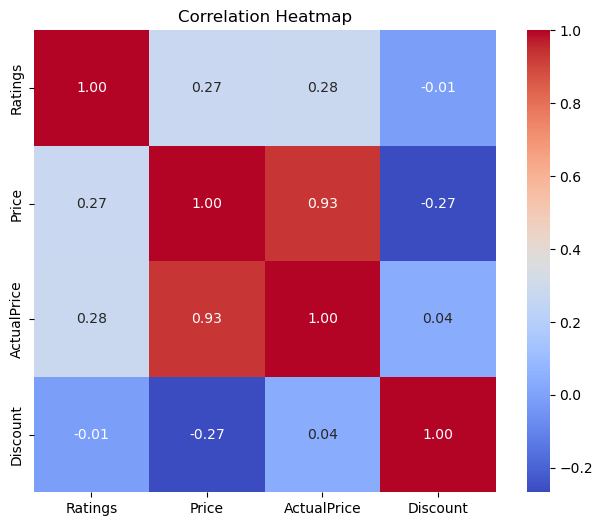

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df3[['Ratings', 'Price', 'ActualPrice', 'Discount']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)

# Title and labels
plt.title('Correlation Heatmap')
plt.show()


In [39]:
df3[['Ratings', 'Price', 'ActualPrice', 'Discount']].corr()

,Ratings,Price,ActualPrice,Discount
Ratings,1.000000,0.274961,0.280400,-0.012724
Price,0.274961,1.000000,0.931679,-0.267073
ActualPrice,0.280400,0.931679,1.000000,0.037738
Discount,-0.012724,-0.267073,0.037738,1.000000


In [41]:
df3['Product type'].unique()

array(['Mixer Juicer', 'Wet Grinders', 'Sandwich Makers', 'Electric Jug',
       'Air Fryers', 'Induction Cooktops', 'Oven Toaster',
       'Electric Cookers', 'Pop-up ToastersPigeon', 'Coffee makers',
       'Appliance Parts', 'Weighing ScalesVenus', 'Roti MakersPrestige',
       'Waffle MakersPrestige', 'Egg Cookers', 'Hand BlendersPrestige'],
      dtype=object)

In [43]:
# Perform ANOVA
from scipy.stats import f_oneway

# Group ratings by brand
groups = [group['Ratings'].values for name, group in df3.groupby('Brand')]

# ANOVA test
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 20.143628527433457, P-value: 8.597097662023037e-16


In [45]:
df4=df3.describe()
df4

,Ratings,Price,ActualPrice,Discount
count,774.000000,774.000000,774.0,774.000000
mean,4.066796,2502.209302,4191.348837,39.421189
std,0.234525,1671.829123,2599.015324,15.466389
min,3.000000,349.000000,698.0,0.000000
25%,4.000000,1199.000000,1995.0,28.000000
50%,4.100000,2199.000000,3545.0,42.000000
75%,4.200000,3499.000000,5499.0,49.000000
max,4.500000,8988.000000,12389.0,78.000000
